In [26]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sn
meubanco = sqlite3.connect('meudb')
cur = meubanco.cursor()

# Análise dos dados do catálogo da Netflix

In [27]:
#importando os dados para um Data Frame
dados = pd.read_csv('netflix_titles.csv')
df = dados
dados.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [28]:
#Transformando a coluna "date_added" de string para date_time
dados['date_added'] = dados['date_added'].str.replace(', ','')
dados['date_added'] = dados['date_added'].str.replace(' ','')
dados['date_added'] = pd.to_datetime(dados['date_added'], format='%B%d%Y')
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Analisando a distribuição de filmes por país

In [29]:
#selecionando apenas os filmes do Data Frame
dados = dados.where(dados['type']=='Movie')
dados = dados.dropna(subset=['country'])
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998.0,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [30]:
#OData Frame passa a ser apenas a coluna de país (country)
dados = dados.filter(items=['country'])

In [31]:
#Onde há uma produção com mais de um país, entao os países serão separados em uma lista
dados['country'] = dados['country'].apply(lambda x: x.split(','))
dados.head(20)

,country
0,[United States]
7,"[United States, Ghana, Burkina Faso, United..."
9,[United States]
12,"[Germany, Czech Republic]"
24,[India]
27,[United States]
28,[United States]
29,"[United States, India, France]"
38,"[China, Canada, United States]"
41,[United States]


In [32]:
#remove caso tenha células com país nulo
dados = dados.dropna(how='all')

In [33]:
#reorganiza o indice do data frame
dados.index = [x for x in range(0,dados.shape[0])]

In [34]:
#quantidade total de filmes
dados.shape

(5691, 1)

In [35]:
dados.tail()

,country
5686,"[United Arab Emirates, Jordan]"
5687,[United States]
5688,[United States]
5689,[United States]
5690,[India]


In [36]:
#descompressa as listas de paises. Assim passa a ter mais de um país para um mesmo filme
for x in range(0,dados.shape[0]):
    if len(dados['country'][x]) > 1:
        for country in dados['country'][x]:
            dados = pd.concat([dados, pd.DataFrame({'country':country},index=[1])],ignore_index=True)
        dados['country'][x] = dados['country'][x][0]
    else:
        dados['country'][x] = dados['country'][x][0]

In [37]:
dados = dados.dropna(subset=['country'])

In [38]:
dados.shape

(8454, 1)

In [39]:
def remove_space(x):
    if isinstance(x,str) and len(x)>1:
        if x[0]==' ':
            return x[1:]
        else:
            return x
dados['country'] = dados['country'].apply(remove_space)

In [40]:
#número de países listados
dados.nunique()

country    117
dtype: int64

<AxesSubplot:title={'center':'Paises'}>

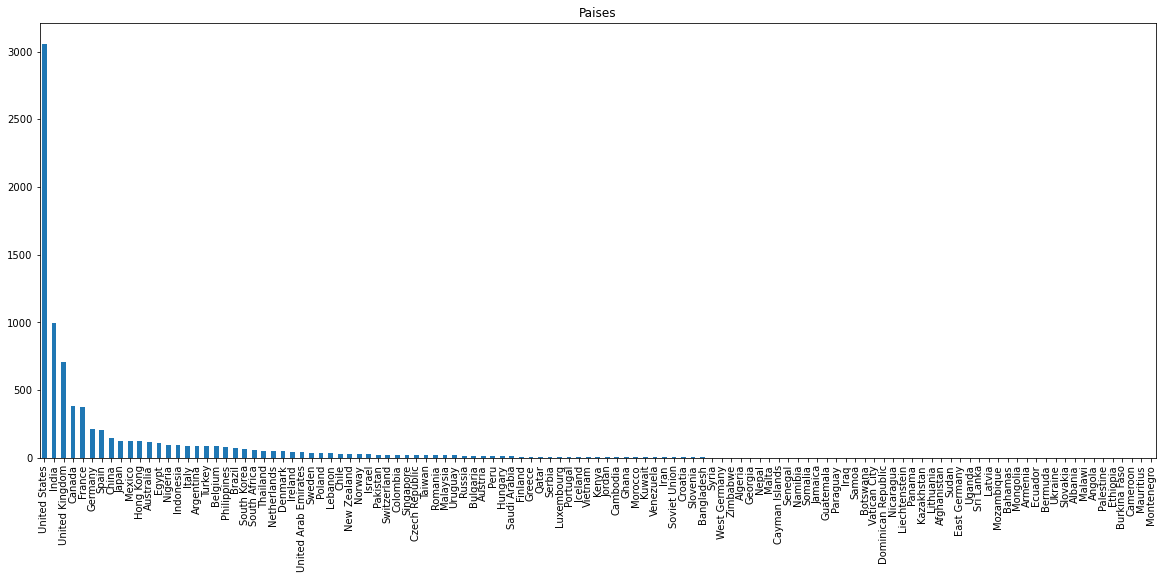

In [41]:
#Constuir aqui um gráfico que envolve todos os países
paises = dados['country'].value_counts()
paises.plot(kind='bar',figsize=(20,8),title="Paises")

In [55]:
df_pib = pd.read_csv('pib.csv', sep=',', header=2)

In [56]:
df_pib = df_pib.filter(items=['Country Name','2021']).dropna(subset=['2021'])

In [57]:
paises = paises.sort_index().to_frame(name='Movies')
paises['Country Name'] = paises.index
paises = paises.reset_index()
paises = paises.drop('index',axis=1)

In [58]:
df_pib_movies = paises.merge(df_pib, how='inner', on='Country Name')
df_pib_movies = df_pib_movies.reindex(columns=['Country Name', 'Movies', '2021'])
df_pib_movies.rename(columns={'2021':'PIB','Movies':'qtd_filmes'}, inplace=True)
df_pib_movies.head()

,Country Name,qtd_filmes,PIB
0,Albania,1,1.826004e+10
1,Algeria,3,1.679831e+11
2,Angola,1,7.254699e+10
3,Argentina,89,4.914927e+11
4,Armenia,1,1.386118e+10


In [59]:
df_pop = pd.read_csv('pop.csv')
df_pop = df_pop.filter(items=['name','pop2020']).sort_values(by=['name'])
df_pop.rename(columns={'name':'Country Name','pop2020':'população'},inplace=True)
df_pib_movies_pop = df_pib_movies.merge(df_pop, how='inner', on='Country Name')
df_pib_movies_pop

,Country Name,qtd_filmes,PIB,população
0,Albania,1,1.826004e+10,2866.849
1,Algeria,3,1.679831e+11,43451.666
2,Angola,1,7.254699e+10,33428.486
3,Argentina,89,4.914927e+11,45036.032
4,Armenia,1,1.386118e+10,2805.608
...,...,...,...,...
91,United Kingdom,710,3.186860e+12,67059.474
92,United States,3058,2.299610e+13,335942.003
93,Uruguay,18,5.931955e+10,3429.086
94,Vietnam,7,3.626375e+11,96648.685


<AxesSubplot:>

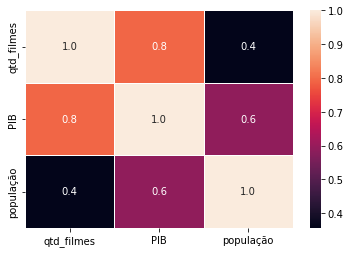

In [60]:
correlation = df_pib_movies_pop.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [61]:
'''s1 = df['release_year'].value_counts()
s1 = s1.sort_index(ascending=False)
c = [x for x in range (1925,2022)]
for i in range(0, len(c)):
    c[i] = 'blue'
c[3] = 'red'
s1.plot(kind='bar',figsize=(20,10),title="Ano de lançamento",color=c)'''

's1 = df[\'release_year\'].value_counts()\ns1 = s1.sort_index(ascending=False)\nc = [x for x in range (1925,2022)]\nfor i in range(0, len(c)):\n    c[i] = \'blue\'\nc[3] = \'red\'\ns1.plot(kind=\'bar\',figsize=(20,10),title="Ano de lançamento",color=c)'

In [62]:
#df['type'].value_counts().plot(kind='pie')

In [63]:
#dados_df.plot(kind='bar',figsize=(30,20))

### Análise das adições de títulos por ano

In [64]:
#df = dados
#df['date_added'] = df['date_added'].dt.strftime('%Y')
#df = df.filter(items=['date_added','type'])
d = df.groupby(['date_added']).value_counts()
#d.plot(kind='bar',figsize=(30,20))

In [65]:
dados3 = df
dados3['date_added'] = dados3['date_added'].dt.strftime('%Y')
dados3.insert(1,'Movie',1)
dados3.insert(1,'TV Show',1)
ano_add = dados3.filter(items=['date_added','type','TV Show', 'Movie'])
for x in range(0,len(ano_add['date_added'])):
    if ano_add.loc[x,'type'] == 'Movie':
        ano_add.loc[x,'Movie'] = 1
    else:
        ano_add.loc[x,'Movie'] = 0
for x in range(0,len(ano_add['date_added'])):
    if ano_add.loc[x,'type'] == 'TV Show':
        ano_add.loc[x,'TV Show'] = 1
    else:
        ano_add.loc[x,'TV Show'] = 0
ano_add = ano_add.groupby(['date_added']).sum(['Movie','Tv Show'])
ano_add = ano_add.sort_values(by='date_added',ascending=False)
display(ano_add)

,TV Show,Movie
date_added,,
2021,505,993
2020,595,1284
2019,592,1424
2018,412,1237
2017,349,839
2016,176,253
2015,26,56
2014,5,19
2013,5,6


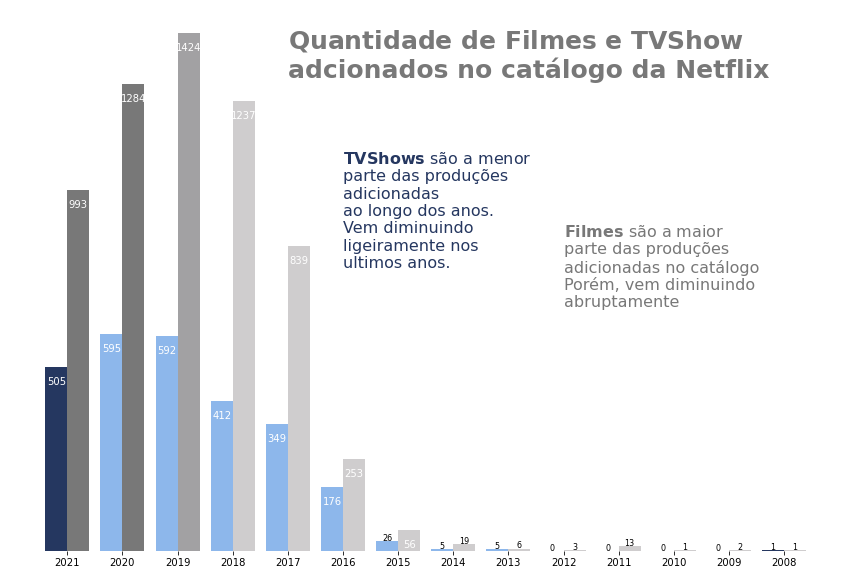

In [69]:
labels = [str(x) for x in range(2021,2007,-1)]
#criando um vetor para cada elemento Status
x = np.array(range(1, ano_add.shape[0]+1))
cinza_claro = "#CFCDCE"
cinza_medio = "#A2A1A3"
cinza_escuro = "#787878"
azul_claro = "#8db7eb"
azul_escuro = "#253760"
azul_medio = "#4169E1"
color_depois = [cinza_escuro, cinza_escuro, cinza_medio, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro, cinza_claro]
color_antes = [azul_escuro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro, azul_claro]
#criar um grafico de barras
fig, ax = plt.subplots(figsize=(15,10))

#plotar barras antes e dpeois separadamente
width_bar = 0.4
barras_antes = ax.bar(x-width_bar/2, ano_add['TV Show'], width_bar, color=color_antes)
barras_depois = ax.bar(x+width_bar/2, ano_add['Movie'], width_bar, color=color_depois)

#removendo elementos desncessarios
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#labels do eixo
ax.set_xticks(x)
ax.set_xticklabels(labels);

#adicionando um título
plt.text(x=5, y=1300, s="Quantidade de $\\bf{Filmes}$ e $\\bf{TV Show}$\nadcionados no catálogo da Netflix", fontsize=25, color=cinza_escuro, weight='bold');

plt.text(x=6, y=1100, s="$\\bf{TVShows}$ são a menor\nparte das produções\nadicionadas\nao longo dos anos.\nVem diminuindo\nligeiramente nos\nultimos anos.",
         verticalalignment="top",fontsize=16, color=azul_escuro)
plt.text(x=10, y=900, s="$\\bf{Filmes}$ são a maior\nparte das produções\nadicionadas no catálogo\nPorém, vem diminuindo\nabruptamente",
         verticalalignment="top",fontsize=16, color=cinza_escuro)
def set_label_y_in_bar(barras):
    for barra in barras:
        barra_altura = barra.get_height()
        if barra_altura >= 40:
            ax.annotate(
                        text='{}'.format(barra_altura),
                        xy=(barra.get_x() + barra.get_width()/2, barra_altura),
                        xytext=(0, -20),
                        textcoords="offset points",
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color='white'
                        )
        else:
            ax.annotate(
                        text='{}'.format(barra_altura),
                        xy=(barra.get_x() + barra.get_width()/2, barra_altura+50),
                        xytext=(0, -20),
                        textcoords="offset points",
                        ha='center',
                        va='bottom',
                        fontsize=8,
                        color='black'
                        )
         
set_label_y_in_bar(barras_antes)
set_label_y_in_bar(barras_depois)

In [37]:
#ano_add.plot(kind='bar',figsize=(20,10))

# Criando um banco de dados

In [38]:
#dados.to_sql('aux',meubanco)

In [ ]:
#verificando as tabelas existentes no banco de dados
tabelas = pd.read_sql_query(sql='SELECT * from sqlite_master WHERE type="table"',con=meubanco)
tabelas

In [ ]:
#verificando a tabela auxiliar criada
banco = pd.read_sql_query(sql='SELECT * FROM aux',con=meubanco)
banco.head()

### Criando as tabelas do banco de dados 

In [ ]:
#criando tabelas para de fato ter um banco de dados descente
#criando diferentes tabelas

#tabela de diretores
cur = meubanco.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS diretores(
                   diretor_id INTEGER PRIMARY KEY AUTOINCREMENT,
                   diretor VARCHAR(50)
);
''')

In [ ]:
#verificando no banco a tabela de diretores que foi criada
tabelas = pd.read_sql_query(sql='SELECT name FROM sqlite_master WHERE type="table"',con=meubanco)
print(tabelas)

In [ ]:
#verificando o estado da tabela diretores
diretores = pd.read_sql_query(sql='SELECT * FROM diretores',con=meubanco)
print(diretores)

In [ ]:
#inserindo o campo director (diretor) da tabela auxiliar para a tabela diretores e commitando os comandos realizados
#inserindo apenas os registros de filmes da tabela auxliar
cur.execute('''INSERT INTO diretores (diretor) SELECT DISTINCT director FROM aux WHERE aux.type = "Movie"
''')

In [ ]:
diretores = pd.read_sql_query(sql='SELECT * FROM diretores',con=meubanco)
diretores.head()

In [ ]:
print(len(diretores))

In [ ]:
#tabela de filmes
cur.execute('''CREATE TABLE IF NOT EXISTS filmes(
                   filme_id INTEGER PRIMARY KEY AUTOINCREMENT,
                   filme VARCHAR(50),
                   diretor_id INTEGER REFERENCES diretores(diretor_id) ON DELETE CASCADE,
                   país VARCHAR(50),
                   ano_estreia INTEGER
);
''')

In [ ]:
#verificando o estado da tabela filmes
filmes = pd.read_sql_query(sql='SELECT * FROM filmes',con=meubanco)
print(filmes)

In [ ]:
cur.execute('''INSERT INTO filmes (filme, país, ano_estreia, diretor_id) 
                SELECT DISTINCT aux.title, aux.country, aux.release_year, diretores.diretor_id 
                FROM aux INNER JOIN diretores ON aux.director = diretores.diretor WHERE aux.type = "Movie"
''')
filmes = pd.read_sql_query(sql='SELECT * FROM filmes',con=meubanco)
filmes.head(15)

In [ ]:
quentin = pd.read_sql_query(sql='SELECT * FROM diretores WHERE diretor = "Quentin Tarantino"',con=meubanco)
quentin.head()

In [ ]:
filmes = pd.read_sql_query(sql='SELECT * FROM filmes WHERE diretor_id = 223',con=meubanco)
filmes.head(15)